<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


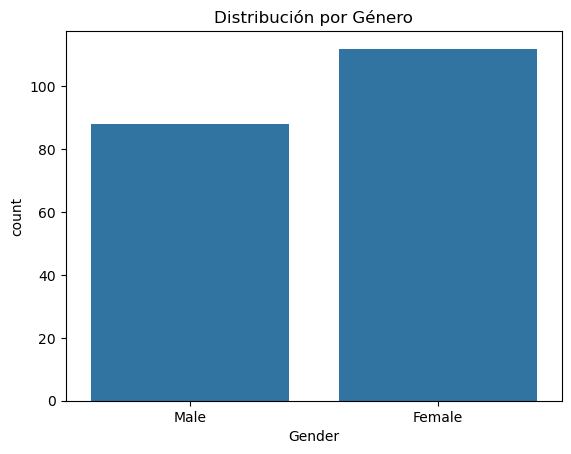

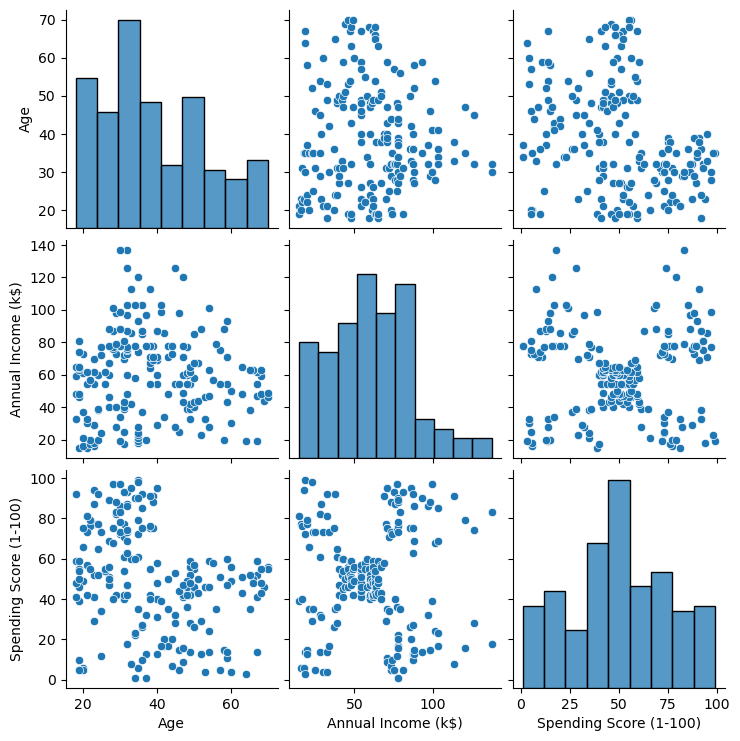

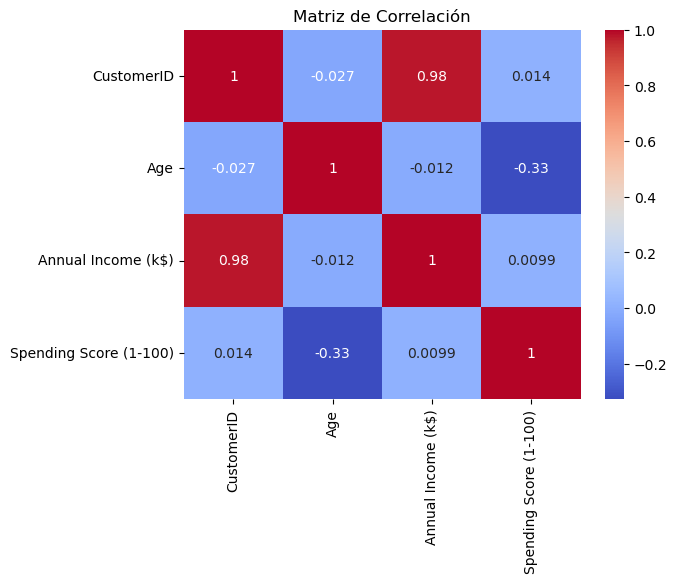

In [3]:
# Paso 1: Análisis exploratorio de los datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Cargar datos
df = pd.read_csv("Mall_Customers.csv")

# Vista general
print(df.info())
display(df.describe())

# Distribución de género
sns.countplot(data=df, x='Gender')
plt.title('Distribución por Género')
plt.show()

# Diagramas de dispersión entre variables relevantes
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

# Mapa de calor de correlación
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [4]:
# Paso 2: Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder

# Codificar género
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Comprobar valores nulos
print(df.isnull().sum())

# Eliminar CustomerID
df_model = df.drop('CustomerID', axis=1)


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Paso 3: Selección de características
features = df_model


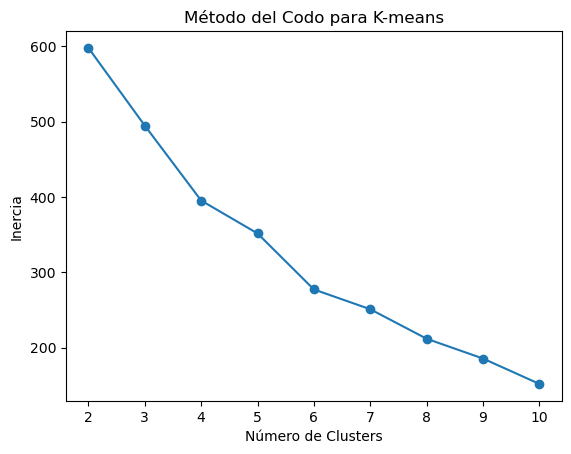

In [6]:
# Paso 4: Entrenamiento de modelos
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Escalar características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Método del codo para K-means
inertia = []
range_k = range(2, 11)
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range_k, inertia, marker='o')
plt.title('Método del Codo para K-means')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

# Entrenar modelos
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(scaled_features)


In [7]:
# Paso 5: Evaluación del desempeño
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
kmeans_ch = calinski_harabasz_score(scaled_features, kmeans_labels)

hier_silhouette = silhouette_score(scaled_features, hierarchical_labels)
hier_ch = calinski_harabasz_score(scaled_features, hierarchical_labels)

print(f"K-means - Silhouette: {kmeans_silhouette:.3f}, Calinski-Harabasz: {kmeans_ch:.2f}")
print(f"Hierarchical - Silhouette: {hier_silhouette:.3f}, Calinski-Harabasz: {hier_ch:.2f}")


K-means - Silhouette: 0.272, Calinski-Harabasz: 62.13
Hierarchical - Silhouette: 0.287, Calinski-Harabasz: 64.47


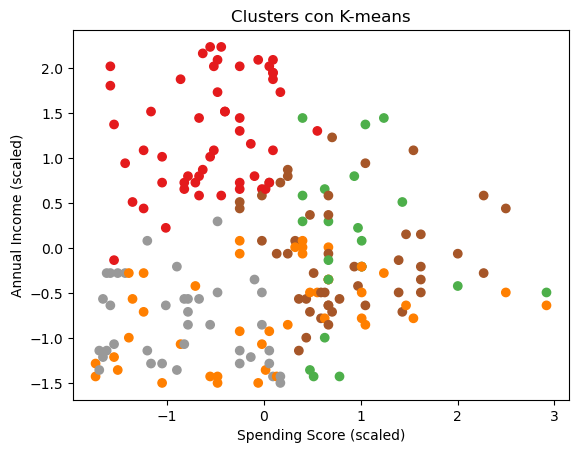

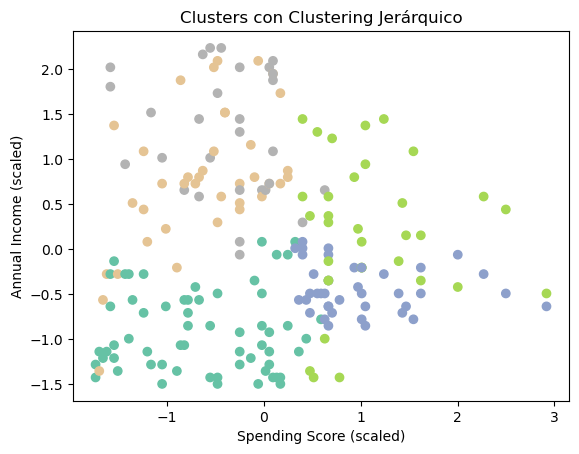

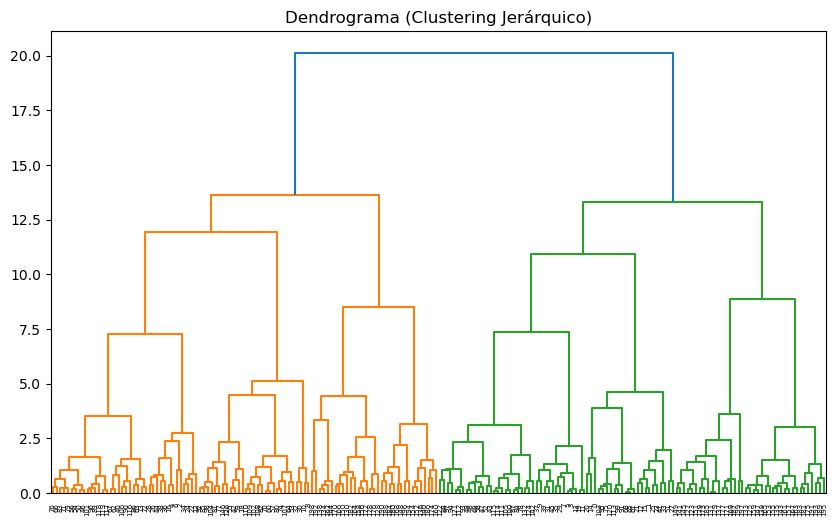

In [9]:
# Paso 6: Visualización de resultados
# Visualización K-means
plt.scatter(scaled_features[:, 2], scaled_features[:, 1], c=kmeans_labels, cmap='Set1')
plt.title('Clusters con K-means')
plt.xlabel('Spending Score (scaled)')
plt.ylabel('Annual Income (scaled)')
plt.show()

# Visualización Hierarchical
plt.scatter(scaled_features[:, 2], scaled_features[:, 1], c=hierarchical_labels, cmap='Set2')
plt.title('Clusters con Clustering Jerárquico')
plt.xlabel('Spending Score (scaled)')
plt.ylabel('Annual Income (scaled)')
plt.show()

# Dendrograma
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrograma (Clustering Jerárquico)')
plt.show()



### Paso 7: Interpretación, análisis y documentación de resultados

El dataset utilizado contiene información de **200 clientes** de un centro comercial. Las variables incluidas son:

- `CustomerID`: identificador único del cliente (no utilizado en el clustering).
- `Gender`: género del cliente (codificado para los modelos).
- `Age`: edad del cliente (rango entre 18 y 70 años).
- `Annual Income (k$)`: ingreso anual del cliente en miles de dólares (rango entre 15 y 137).
- `Spending Score (1-100)`: puntaje que representa el comportamiento de gasto del cliente asignado por el mall (rango entre 1 y 99).

Desde un punto de vista estadístico:
- La edad promedio es de **38.85 años**, con una desviación de ~14 años.
- El ingreso promedio es de **60.56k$**, pero con alta variabilidad.
- El puntaje de gasto también es muy diverso, con una media de **50.2** y una desviación de ~25.8.
---

#### Resultados del modelo K-means:
- Número de clusters: 5 (seleccionado usando el método del codo).
- **Coeficiente de Silhouette**: `0.272`
- **Índice de Calinski-Harabasz**: `62.13`

Los valores indican que, aunque hay cierta separación entre los grupos, los límites entre algunos clusters pueden no estar del todo definidos, posiblemente por la variabilidad en ingresos y gasto.

---

####  Resultados del modelo de Clustering Jerárquico:
- Número de clusters: 5 (seleccionados visualmente desde el dendrograma).
- **Coeficiente de Silhouette**: `0.287`
- **Índice de Calinski-Harabasz**: `64.47`

Estos resultados muestran **ligeramente mejor desempeño** que K-means. La naturaleza jerárquica permite capturar mejor las relaciones entre grupos, especialmente cuando hay posibles subgrupos dentro de un mismo segmento.

---